In [1]:
# connect colab ke drive
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# dataset yang berisi timeline pembelian produk (pada project ini, dataset
# yang dipakai berada di google drive, sehingga jika project ini hendak dirun
# di akun lain maka diperlukan penyesuaian path)
dataMain = pd.read_csv('/content/gdrive/My Drive/Tugas Kuliah/Machine Learning/CSV/MainDatasetPenjualan.csv')
dataMain.head(10)

,Tanggal,Kode,Nama,Jumlah,Harga,Total
0,11/1/2021,KK0538,GG SURYA 12,1,19000,19000
1,11/1/2021,KK1288,BONCABE MAKARONI 150G LV 10,1,7500,7500
2,11/1/2021,KK1697,INDOFOOD SAMBAL PEDAS MANIS 135ML,1,5500,5500
3,11/1/2021,KK0540,GG SURYA 50 ECER,2,1500,3000
4,11/1/2021,KK0432,MENARA FILTER MERAH BKS 16'S,1,16000,16000
5,11/1/2021,KK0963,LE MINERAL 600ML,1,2500,2500
6,11/1/2021,KK1512,INDOFOOD BUMBU OPOR SYSM,1,5500,5500
7,11/1/2021,KK0145,KAPAL API SPECIAL PCK 65g,1,5000,5000
8,11/1/2021,KK1852,SAORI SAUS RASA MENTEGA 26ML,1,3000,3000
9,11/1/2021,KK1157,AICE SWEET CORN,1,3000,3000


In [4]:
# dataset yang berisi akumulasi pembelian per produk dalam waktu satu bulan (dataset yang akan dipakai)
dataSorted = pd.read_csv('/content/gdrive/My Drive/Tugas Kuliah/Machine Learning/CSV/SortedDatasetPenjualan.csv')
dataSorted.head(10)

,Kode,Nama,Jumlah,Harga,Total
0,KK0538,GG SURYA 12,114,19000,2166000
1,KK1288,BONCABE MAKARONI 150G LV 10,1,7500,7500
2,KK1697,INDOFOOD SAMBAL PEDAS MANIS 135ML,2,5500,11000
3,KK0540,GG SURYA 50 ECER,175,1500,262500
4,KK0432,MENARA FILTER MERAH BKS 16'S,3,16000,48000
5,KK0963,LE MINERAL 600ML,5,2500,12500
6,KK1512,INDOFOOD BUMBU OPOR SYSM,1,5500,5500
7,KK0145,KAPAL API SPECIAL PCK 65g,10,5000,50000
8,KK1852,SAORI SAUS RASA MENTEGA 26ML,1,3000,3000
9,KK1157,AICE SWEET CORN,19,3000,57000


In [5]:
# menampilkan jumlah baris dan kolom dataset
dataSorted.shape

(701, 5)

In [6]:
# menampilkan jumlah cell yang kosong pada dataset
dataSorted.isnull().sum()

Kode      0
Nama      0
Jumlah    0
Harga     0
Total     0
dtype: int64

In [7]:
# memindahkan isi dataset ke dataframe baru
dfSale = dataSorted.copy()
dfSale.head(10)

,Kode,Nama,Jumlah,Harga,Total
0,KK0538,GG SURYA 12,114,19000,2166000
1,KK1288,BONCABE MAKARONI 150G LV 10,1,7500,7500
2,KK1697,INDOFOOD SAMBAL PEDAS MANIS 135ML,2,5500,11000
3,KK0540,GG SURYA 50 ECER,175,1500,262500
4,KK0432,MENARA FILTER MERAH BKS 16'S,3,16000,48000
5,KK0963,LE MINERAL 600ML,5,2500,12500
6,KK1512,INDOFOOD BUMBU OPOR SYSM,1,5500,5500
7,KK0145,KAPAL API SPECIAL PCK 65g,10,5000,50000
8,KK1852,SAORI SAUS RASA MENTEGA 26ML,1,3000,3000
9,KK1157,AICE SWEET CORN,19,3000,57000


In [8]:
# menghapus kolom Kode dan Nama dari dataset
dfSale.drop('Kode',axis=1,inplace=True)
dfSale.drop('Nama',axis=1,inplace=True)
dfSale.head(10)

,Jumlah,Harga,Total
0,114,19000,2166000
1,1,7500,7500
2,2,5500,11000
3,175,1500,262500
4,3,16000,48000
5,5,2500,12500
6,1,5500,5500
7,10,5000,50000
8,1,3000,3000
9,19,3000,57000


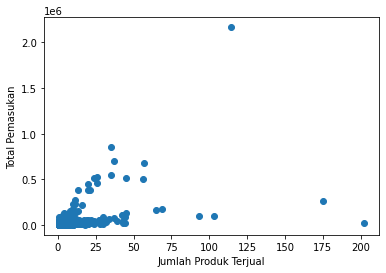

In [9]:
# menampilkan plotting
plt.scatter(dfSale['Jumlah'],dfSale['Total'])
plt.xlabel('Jumlah Produk Terjual')
plt.ylabel('Total Pemasukan')
plt.show()

In [10]:
# normalisasi data
from sklearn.preprocessing import normalize
dataScaled = normalize(dfSale)

In [11]:
# menampilkan dataset dengan nilai yang telah dinormalisasi
dataScaled = pd.DataFrame(dataScaled,columns=dfSale.columns)
dataScaled.head(10)

,Jumlah,Harga,Total
0,0.000053,0.008772,0.999962
1,0.000094,0.707107,0.707107
2,0.000163,0.447214,0.894427
3,0.000667,0.005714,0.999983
4,0.000059,0.316228,0.948683
5,0.000392,0.196116,0.980581
6,0.000129,0.707107,0.707107
7,0.000199,0.099504,0.995037
8,0.000236,0.707107,0.707107
9,0.000333,0.052559,0.998618


In [12]:
# mencari jumlah cluster terbaik dengan metode elbow 
wss = []
for i in range(1,10):
  from sklearn.cluster import KMeans
  kMeans = KMeans(n_clusters=i)
  kMeans.fit(dataScaled)
  wss.append(kMeans.inertia_)

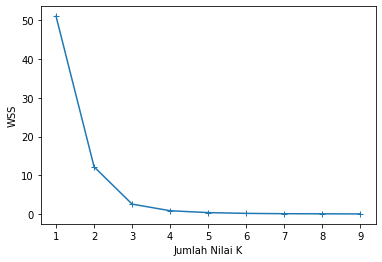

In [13]:
# menampilkan plot perhitungan, perubahan paling ekstrem terdapat pada indeks
# ke-3, sehingga jumlah cluster terbaik adalah 3
plt.plot([1,2,3,4,5,6,7,8,9],wss,marker='+')
plt.xlabel('Jumlah Nilai K')
plt.ylabel('WSS')
plt.show()

In [14]:
# deklarasi jumlah cluster
from sklearn.cluster import KMeans
kMeans = KMeans(n_clusters=3)
kMeans.fit(dataScaled)

KMeans(n_clusters=3)

In [15]:
# melakukan klasifikasi data sesuai dengan cluster, dan memasukkan hasil 
# kelasnya sebagai kolom baru pada dataset
identifiedClusters = kMeans.fit_predict(dataScaled)
dfSale['Cluster_int'] = identifiedClusters

In [16]:
# menampilkan inersia (pengukuran seberapa baik clustering yang telah dilakukan
# dengan KMeans, semakin kecil nilai semakin baik)
kMeans.inertia_

2.55173791217129

In [17]:
# menampilkan dataset
dfSale.head(10)

,Jumlah,Harga,Total,Cluster_int
0,114,19000,2166000,0
1,1,7500,7500,1
2,2,5500,11000,2
3,175,1500,262500,0
4,3,16000,48000,2
5,5,2500,12500,0
6,1,5500,5500,1
7,10,5000,50000,0
8,1,3000,3000,1
9,19,3000,57000,0


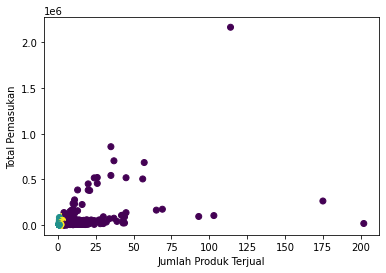

In [18]:
# menampilkan hasil klasifikasi
plt.scatter(dfSale['Jumlah'],dfSale['Total'],c=dfSale['Cluster_int'])
plt.xlabel('Jumlah Produk Terjual')
plt.ylabel('Total Pemasukan')
plt.show()


In [19]:
# menampilkan dataset dengan jenis klasifikasi, produk dengan status 'Sangat
# Laris' sangat disarankan untuk dijual

dfSale.Cluster_int.apply(str)
dataSorted.loc[dfSale['Cluster_int'] == 0, 'Status Penjualan'] = 'Sangat Laris'
dataSorted.loc[dfSale['Cluster_int'] == 2, 'Status Penjualan'] = 'Laris'
dataSorted.loc[dfSale['Cluster_int'] == 1, 'Status Penjualan'] = 'Kurang Laris'
dataSorted.head(10)


,Kode,Nama,Jumlah,Harga,Total,Status Penjualan
0,KK0538,GG SURYA 12,114,19000,2166000,Sangat Laris
1,KK1288,BONCABE MAKARONI 150G LV 10,1,7500,7500,Kurang Laris
2,KK1697,INDOFOOD SAMBAL PEDAS MANIS 135ML,2,5500,11000,Laris
3,KK0540,GG SURYA 50 ECER,175,1500,262500,Sangat Laris
4,KK0432,MENARA FILTER MERAH BKS 16'S,3,16000,48000,Laris
5,KK0963,LE MINERAL 600ML,5,2500,12500,Sangat Laris
6,KK1512,INDOFOOD BUMBU OPOR SYSM,1,5500,5500,Kurang Laris
7,KK0145,KAPAL API SPECIAL PCK 65g,10,5000,50000,Sangat Laris
8,KK1852,SAORI SAUS RASA MENTEGA 26ML,1,3000,3000,Kurang Laris
9,KK1157,AICE SWEET CORN,19,3000,57000,Sangat Laris


In [20]:
# menyimpan dataframe yang telah memiliki 'Status Penjualan'
dataSorted.to_csv('dataRecommendation.csv')
!cp dataRecommendation.csv "/content/gdrive/My Drive/Tugas Kuliah/Machine Learning/CSV/FinishedDatasetPenjualan.csv"